<a href="https://colab.research.google.com/github/Pranay138/Projects/blob/main/credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')


In [ ]:
data = pd.read_csv('/content/creditcard.csv')
df = data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(51591, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [ ]:
df.Time.tail(15)

51576    45015
51577    45016
51578    45017
51579    45018
51580    45020
51581    45020
51582    45021
51583    45021
51584    45021
51585    45022
51586    45023
51587    45024
51588    45024
51589    45024
51590    45026
Name: Time, dtype: int64

In [ ]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000
mean,29408.888120,-0.244221,0.003887,0.691974,0.183611,-0.259039,0.104715,-0.120474,0.054468,0.108449,-0.054371,0.362256,-0.322181,0.152821,0.159235,0.125138,-0.016224,0.113820,-0.094711,-0.028092,0.047357,-0.028862,-0.106634,-0.039418,0.007995,0.135556,0.020305,0.004140,0.003987,94.014363,0.002908
std,13196.047307,1.887998,1.641193,1.498371,1.398830,1.413486,1.312673,1.278442,1.216566,1.208872,1.138363,1.117580,1.326217,1.115140,1.117947,0.948628,0.950118,1.103080,0.872950,0.820439,0.729076,0.732046,0.636907,0.592622,0.595768,0.438858,0.500884,0.389621,0.332373,253.518524,0.053844
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,-18.271168,-4.049895,-17.769143,-3.844974,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-4.932733,-15.806476,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,22655.500000,-0.993823,-0.570329,0.215237,-0.723584,-0.871680,-0.634868,-0.606774,-0.146407,-0.622868,-0.530480,-0.444924,-0.899828,-0.591081,-0.302856,-0.434722,-0.499681,-0.361343,-0.570695,-0.523492,-0.165868,-0.230767,-0.528352,-0.178719,-0.322127,-0.128074,-0.330665,-0.063502,-0.006740,7.680000,0.000000
50%,33767.000000,-0.246892,0.075692,0.793662,0.190588,-0.290140,-0.150447,-0.077622,0.059086,-0.000482,-0.110558,0.321590,-0.018594,0.098283,0.142180,0.240550,0.053463,0.061186,-0.078235,-0.032503,-0.022503,-0.067054,-0.081866,-0.051550,0.062606,0.174933,-0.072844,0.008875,0.022241,25.345000,0.000000
75%,39498.000000,1.154831,0.731302,1.429386,1.066994,0.282184,0.495847,0.424977,0.333436,0.800723,0.416716,1.158366,0.547395,0.864066,0.653344,0.803202,0.547415,0.536719,0.400938,0.480934,0.172761,0.108996,0.307826,0.078873,0.401672,0.421984,0.299365,0.083277,0.076230,86.160000,0.000000
max,45026.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,12.018913,4.846452,4.465413,7.692209,5.784514,6.098529,9.253526,4.295648,5.228342,26.237391,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [ ]:
df.Class.value_counts()


0.0    51440
1.0      150
Name: Class, dtype: int64

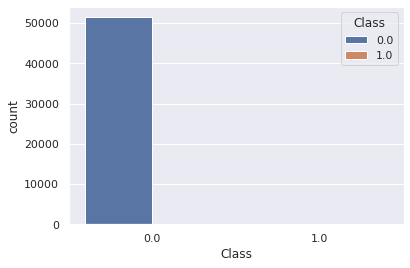

In [ ]:
sns.countplot(x=df.Class, hue=df.Class)

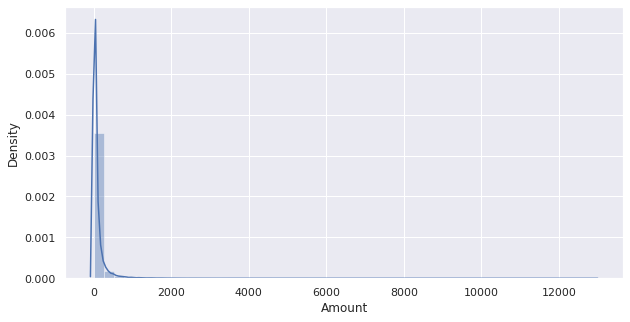

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

In [ ]:
df['Amount-Bins'] = ''

In [ ]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)

    return bins, bin_labels

In [ ]:
bins, bin_labels = make_bins(df.Amount, size=10)

In [ ]:
df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 1434
1,0 to 1434
2,0 to 1434
3,0 to 1434
4,0 to 1434


In [ ]:
df['Amount-Bins'].value_counts()

0 to 1434         51282
1434 to 2869        242
2869 to 4303         47
4303 to 5738         11
5738 to 7172          4
7172 to 8607          3
11476 to 12910        1
8607 to 10041         0
10041 to 11476        0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

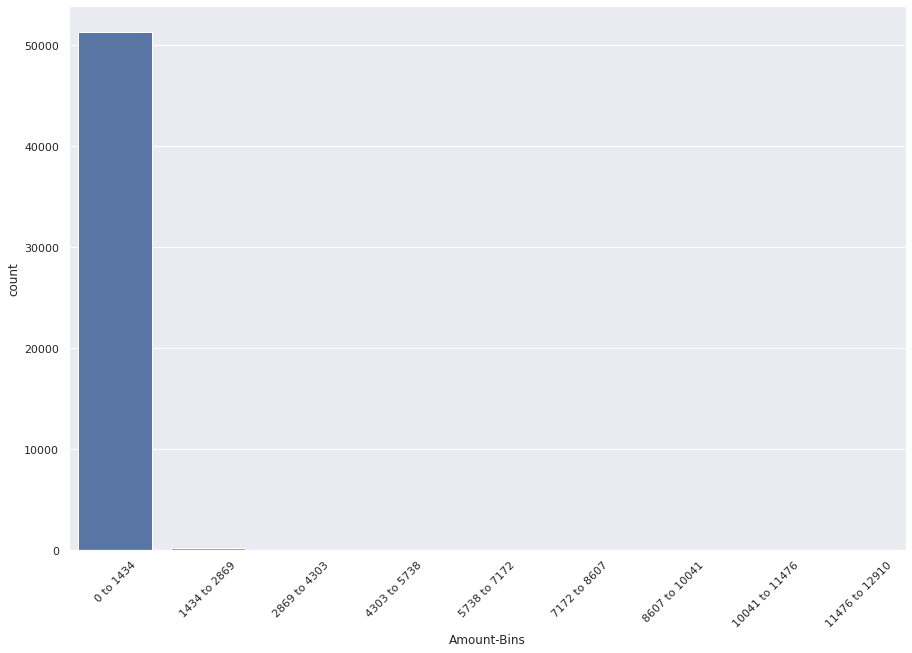

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

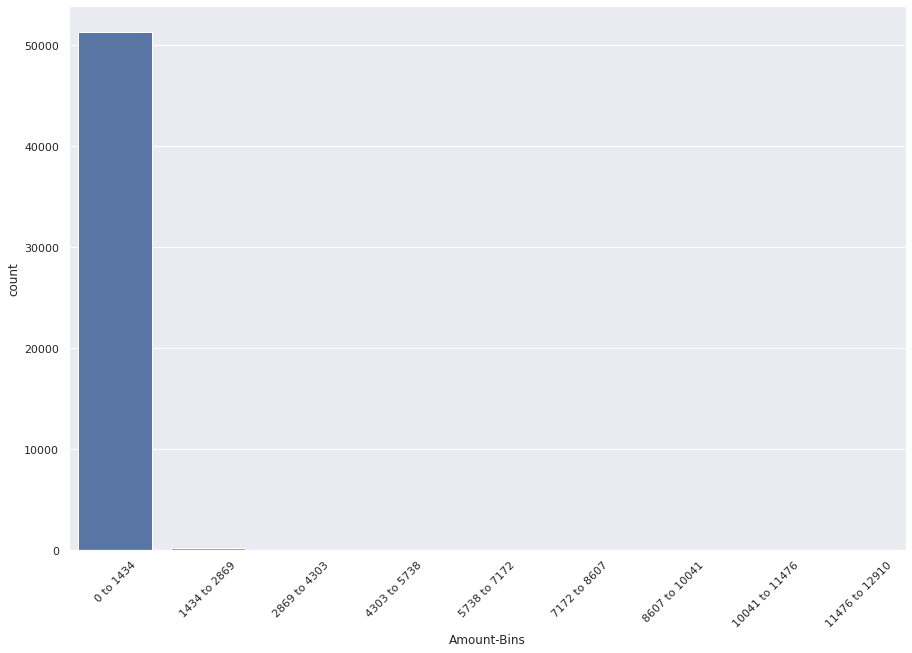

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df[~(df['Amount-Bins'] == '0 to 2854')])
plt.xticks(rotation=45)

In [ ]:
df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
df = df_encoded.copy()

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount-Bins_0 to 1434,Amount-Bins_1434 to 2869,Amount-Bins_2869 to 4303,Amount-Bins_4303 to 5738,Amount-Bins_5738 to 7172,Amount-Bins_7172 to 8607,Amount-Bins_8607 to 10041,Amount-Bins_10041 to 11476,Amount-Bins_11476 to 12910
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,1,0,0,0,0,0,0,0,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,1,0,0,0,0,0,0,0,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1,0,0,0,0,0,0,0,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,1,0,0,0,0,0,0,0,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,1,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

X.shape, Y.shape

((51591, 39), (51591,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(36113, 39) (36113,)
(15478, 39) (15478,)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
lr_mod = LogisticRegression()

In [ ]:
# Training the algorithm
lr_mod.fit(xtest, ytest)


LogisticRegression()

In [ ]:
lr_pred_test = lr_mod.predict(xtest)
lr_pred_train = lr_mod.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,32,18
Not Fraud,11,15417


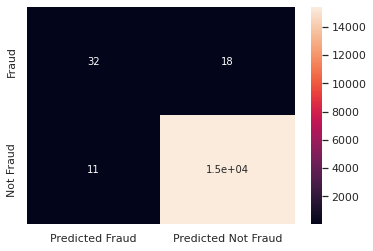

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
lr_accuracy = accuracy_score(ytest, lr_pred_test)
lr_accuracy

0.9981263729163975

In [ ]:
lr_recall_train = recall_score(ytest, lr_pred_train)
lr_recall_train

0.64

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
lr_f1 = f1_score(ytest, lr_pred_test)
lr_f1

0.6881720430107526

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest, lr_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15428
         1.0       0.74      0.64      0.69        50

    accuracy                           1.00     15478
   macro avg       0.87      0.82      0.84     15478
weighted avg       1.00      1.00      1.00     15478



In [ ]:
lr_pred_test_prob = lr_mod.predict_proba(xtest)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_test_prob)

In [ ]:
lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

0.9273010111485611

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')

    plt.show()

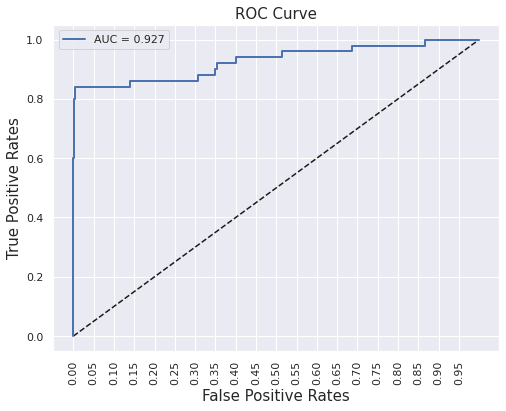

In [ ]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtest)
xtest_poly = poly.fit_transform(xtest)
model = LogisticRegression()
model.fit(xtest_poly, ytest)
train_prob = model.predict_proba(xtest_poly)[:, 1]
test_prob = model.predict_proba(xtest_poly)[:, 1]
roc_auc_score(ytest, train_prob), roc_auc_score(ytest, test_prob)

(0.8549105522426756, 0.8549105522426756)

In [ ]:
fpr_poly, tpr_poly, threshold_poly = roc_curve(ytest, test_prob)

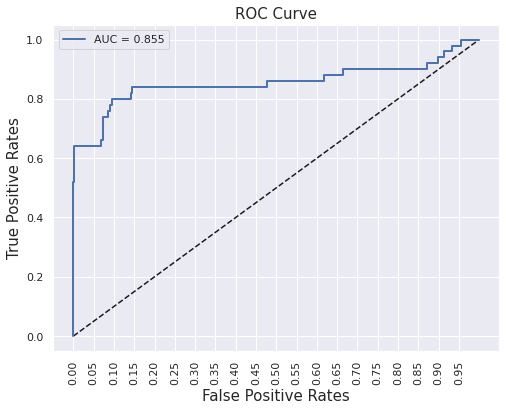

In [ ]:
plot_roc_curve(fpr=fpr_poly, tpr=tpr_poly, label='AUC = %.3f' %  roc_auc_score(ytest, test_prob))

In [ ]:
recall_score(ytest, model.predict(xtest_poly))

0.64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount-Bins_0 to 1434,Amount-Bins_1434 to 2869,Amount-Bins_2869 to 4303,Amount-Bins_4303 to 5738,Amount-Bins_5738 to 7172,Amount-Bins_7172 to 8607,Amount-Bins_8607 to 10041,Amount-Bins_10041 to 11476,Amount-Bins_11476 to 12910
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1,0,0,0,0,0,0,0,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,0,0,0,0,0,0,0,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1,0,0,0,0,0,0,0,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1,0,0,0,0,0,0,0,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1,0,0,0,0,0,0,0,0


In [ ]:
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount-Bins_0 to 1434,Amount-Bins_1434 to 2869,Amount-Bins_2869 to 4303,Amount-Bins_4303 to 5738,Amount-Bins_5738 to 7172,Amount-Bins_7172 to 8607,Amount-Bins_8607 to 10041,Amount-Bins_10041 to 11476,Amount-Bins_11476 to 12910
0,0.000000,0.943114,0.799158,0.957769,0.302382,0.543337,0.546786,0.423686,0.676242,0.490309,0.583486,0.217707,0.758386,0.343376,0.702549,0.565632,0.665904,0.737173,0.690464,0.525213,0.381932,0.472136,0.616099,0.604796,0.423810,0.585545,0.272453,0.441609,0.220792,0.011589,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.986831,0.802887,0.893835,0.259453,0.548514,0.535598,0.418650,0.676021,0.458840,0.575295,0.352398,0.832805,0.521524,0.708770,0.481842,0.713423,0.727794,0.675302,0.471107,0.374309,0.467297,0.552450,0.609604,0.364436,0.588512,0.334287,0.434375,0.221615,0.000208,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000022,0.943139,0.785215,0.937181,0.256297,0.541195,0.574268,0.432415,0.678665,0.394844,0.587199,0.290899,0.788625,0.548984,0.707946,0.653957,0.542839,0.763381,0.679797,0.262854,0.388438,0.478347,0.650395,0.627950,0.313432,0.550510,0.282271,0.432022,0.219901,0.029329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000022,0.949857,0.797921,0.937715,0.198917,0.547600,0.562904,0.423655,0.680775,0.401330,0.578855,0.237940,0.793584,0.523770,0.703413,0.354342,0.635935,0.711253,0.831100,0.364146,0.371004,0.470037,0.597170,0.602983,0.242451,0.625391,0.266012,0.438014,0.222690,0.009566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000044,0.946568,0.809615,0.931125,0.257371,0.542442,0.539259,0.429275,0.670238,0.513379,0.604532,0.200827,0.809501,0.624619,0.672500,0.435507,0.666868,0.724243,0.685826,0.564529,0.385669,0.472343,0.652242,0.604184,0.434661,0.559851,0.408171,0.445967,0.226226,0.005421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
xtrainS, xtestS, ytrainS, ytestS = train_test_split(
    X_scaled, Y, random_state=42, test_size=0.30, shuffle=True)
print(xtrainS.shape, ytrainS.shape)
print(xtestS.shape, ytestS.shape)

(36113, 39) (36113,)
(15478, 39) (15478,)


In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(xtestS, ytestS)


SVC(kernel='linear', probability=True)

In [ ]:
svc_pred = svc_model.predict(xtestS)
svc_recall = recall_score(ytestS, svc_pred)
svc_recall

0.78

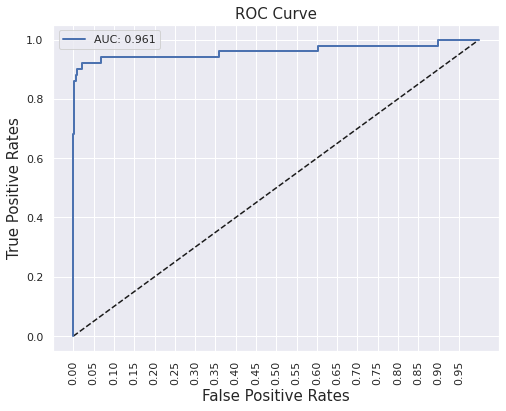

In [ ]:
svc_pred_prob = svc_model.predict_proba(xtestS)[:, 1]
svc_auc = roc_auc_score(ytest, svc_pred_prob)
fpr, tpr, threshold = roc_curve(ytestS, svc_pred_prob)
plot_roc_curve(fpr, tpr, 'AUC: %.3f' % svc_auc)

In [ ]:
# For Kernel = rbf
tuned_rbf = {'kernel': ['rbf'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = sigmoid
tuned_sigmoid = {'kernel': ['sigmoid'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = linear
tuned_linear = {'kernel': ['linear'], 'C': [
    0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rs_rbf = RandomizedSearchCV(estimator=SVC(probability=True),
        param_distributions=tuned_rbf, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_sigmoid = RandomizedSearchCV(estimator=SVC(probability=True),
        param_distributions=tuned_sigmoid, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_linear = RandomizedSearchCV(estimator=SVC(probability=True),
        param_distributions=tuned_linear, n_iter=500, n_jobs=4, scoring='roc_auc')

In [ ]:
rs_rbf.fit(xtestS, ytestS)

RandomizedSearchCV(estimator=SVC(probability=True), n_iter=500, n_jobs=4,
                   param_distributions={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100,
                                              1000],
                                        'gamma': [0.01, 0.001, 0.0001, 1e-05],
                                        'kernel': ['rbf']},
                   scoring='roc_auc')

In [ ]:
rs_rbf.best_estimator_

SVC(C=10, gamma=1e-05, probability=True)

In [ ]:
svc_rbf_best_est = rs_rbf.best_estimator_
svc_rbf_best_est.fit(xtestS, ytestS)

SVC(C=10, gamma=1e-05, probability=True)

In [ ]:
vc_rbf_best_est_pred = svc_rbf_best_est.predict(xtestS)

In [ ]:
svc_rbf_best_est_pred_proba = svc_rbf_best_est.predict_proba(xtestS)[:, 1]

In [ ]:
svc_rbf_auc = roc_auc_score(ytestS, svc_rbf_best_est_pred_proba)

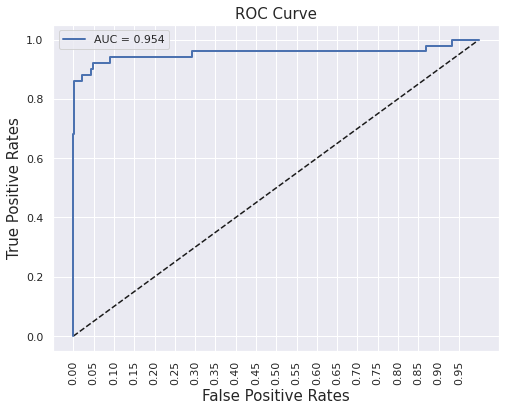

In [ ]:
fpr, tpr, threshold = roc_curve(ytestS, svc_rbf_best_est_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_rbf_auc)

In [ ]:
rs_sigmoid.fit(xtestS, ytestS)
svc_sigmoid = rs_sigmoid.best_estimator_

In [ ]:
svc_sigmoid.fit(xtestS, ytestS)

SVC(C=0.001, gamma=0.01, kernel='sigmoid', probability=True)

In [ ]:
svc_sigmoid_pred = svc_sigmoid.predict(xtestS)
svc_sigmoid_pred_proba = svc_sigmoid.predict_proba(xtestS)[:, 1]

In [ ]:
svc_sigmoid_auc = roc_auc_score(ytestS, svc_sigmoid_pred_proba)
svc_sigmoid_auc

0.9545890588540316

In [ ]:
svc_sigmoid_recall = recall_score(ytestS, svc_sigmoid_pred)
svc_sigmoid_recall

0.0

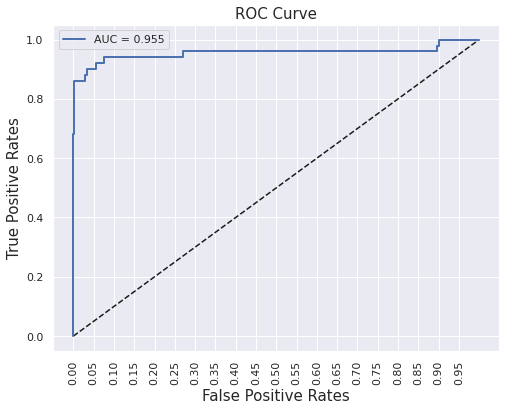

In [ ]:
fpr, tpr, threshold = roc_curve(ytestS, svc_sigmoid_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_sigmoid_auc)

In [ ]:
rs_linear.fit(xtestS, ytestS)
svc_linear = rs_linear.best_estimator_

In [ ]:
svc_linear.fit(xtestS, ytestS)

SVC(C=50, kernel='linear', probability=True)

In [ ]:
svc_linear_pred = svc_linear.predict(xtestS)
svc_linear_pred_proba = svc_linear.predict_proba(xtestS)[:, 1]

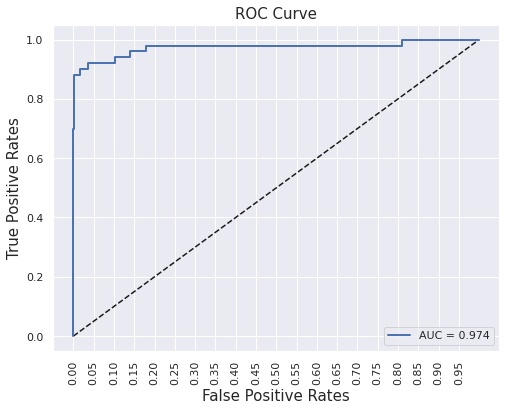

In [ ]:
svc_linear_auc = roc_auc_score(ytestS, svc_linear_pred_proba)

fpr, tpr, threshold = roc_curve(ytestS, svc_linear_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_linear_auc)


In [ ]:
svc_linear_recall = recall_score(ytestS, svc_linear_pred)
svc_linear_recall

0.8

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtest, ytest)

GaussianNB()

In [ ]:
nb_pred = nb.predict(xtest)
nb_pred_proba = nb.predict_proba(xtest)[:, 1]

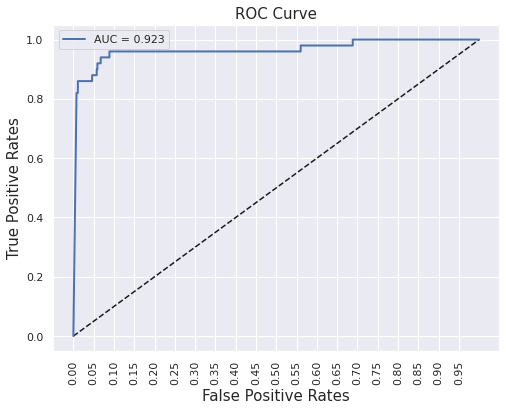

In [ ]:
nb_auc = roc_auc_score(ytest, nb_pred)
fpr, tpr, threshold = roc_curve(ytestS, nb_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % nb_auc)

In [ ]:
nb_recall = recall_score(ytest, nb_pred)
nb_recall

0.86